   ## TRABALHO DE CONCLUSÃO DE CURSO EM CIÊNCIA DE DADOS - PUC MINAS
   
   ## Aluno: Anderson Lhoret
   
   ## MODELO PREDITIVO DE DURAÇÃO DE OPERAÇÃO DE TRÂNSITO ADUANEIRO
   
   # Notebook 4: Modelo de Machine Learning - Regressão

## 1. Inicialização do Dataset

In [1]:
import pandas as pd
from pycaret.regression import *
import shap
import timeit

In [2]:
# Base processada (pós análise exploratória dos dados)
df = pd.read_pickle('dataset_explorado.pkl')

In [3]:
# Imprime as colunas do arquivo
print('Dataset: ' + str(list(df)))

Dataset: ['dt_inicio', 'dt_conclusao', 'peso_bruto', 'origem_latitude', 'origem_longitude', 'dest_realizado_latitude', 'dest_realizado_longitude', 'orig&dest', 'HDD', 'DDS', 'duracao', 'elevacao_origem', 'elevacao_destino', 'delta_elevacao', 'distancia', 'duracao_horas_Google', 'indice_duracao', 'v_med']


In [3]:
# Configuração de HDD e DDS como categoria
df["HDD"] = df["HDD"].astype("category")
df["DDS"] = df["DDS"].astype("category")

In [4]:
# Filtra colunas para obter o dataset a ser usado nos modelos de aprendizado de maquina
dataset = df[['duracao', 'peso_bruto', 'delta_elevacao', 'distancia', 'orig&dest', 'HDD', 'DDS']]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21417 entries, 1 to 113576
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   duracao         21417 non-null  float64 
 1   peso_bruto      21417 non-null  float64 
 2   delta_elevacao  21417 non-null  float64 
 3   distancia       21417 non-null  float64 
 4   orig&dest       21417 non-null  object  
 5   HDD             21417 non-null  category
 6   DDS             21417 non-null  category
dtypes: category(2), float64(4), object(1)
memory usage: 1.0+ MB


In [7]:
dataset.head()

,duracao,peso_bruto,delta_elevacao,distancia,orig&dest,HDD,DDS
1,24.956944,14006.72,-369.224182,791.0,810300 917500,15,Tuesday
3,25.008611,15605.88,-369.224182,791.0,810300 917500,15,Tuesday
5,25.172500,10570.00,-909.368223,844.0,917900 717700,16,Tuesday
10,22.926389,20585.60,-345.040039,685.0,617700 817600,18,Tuesday
17,19.690833,29152.31,-782.565247,572.0,610500 817800,14,Wednesday


In [5]:
# Define valor de K-fold para validação cruzada
pFold = 4

## 2. Setup do modelo

### 2.1. Setup básico

In [9]:
setupBasico = setup(data = dataset, target = 'duracao', fold_shuffle = True, session_id = 123, train_size = 0.8, silent = True) 

,Description,Value
0,session_id,123
1,Target,duracao
2,Original Data,"(21417, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(17133, 219)"


#### 2.1.1. Comparação dos modelos (setup básico)

In [10]:
start = timeit.default_timer()
top = compare_models(fold = pFold, n_select = 3, exclude = ['huber', 'lar'])
stop = timeit.default_timer()
execution_time = (stop - start)/60 # segundos para minutos
print("Programa executou em "+str(execution_time) + " minutos")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.1125,11.4702,3.3852,0.9195,0.1692,0.1566,0.2075
catboost,CatBoost Regressor,2.1308,11.4648,3.3847,0.9195,0.1707,0.1593,2.1875
xgboost,Extreme Gradient Boosting,2.1052,11.7671,3.4285,0.9174,0.1688,0.1545,3.2575
gbr,Gradient Boosting Regressor,2.2683,12.2943,3.5048,0.9137,0.1810,0.1728,2.1450
rf,Random Forest Regressor,2.0841,12.8107,3.5782,0.9100,0.1705,0.1469,2.8225
ridge,Ridge Regression,2.3403,13.1392,3.6231,0.9078,0.1937,0.1832,0.1175
br,Bayesian Ridge,2.3413,13.1302,3.6219,0.9078,0.1937,0.1833,0.3300
omp,Orthogonal Matching Pursuit,2.3898,13.5593,3.6804,0.9048,0.1988,0.1847,0.1075
lr,Linear Regression,2.4282,13.7249,3.7018,0.9037,0.2160,0.2022,1.5800
ada,AdaBoost Regressor,2.7657,15.3604,3.9182,0.8921,0.2558,0.2737,1.5500


Programa executou em 1.600509155 minutos


In [11]:
catboost_set1 = top[1]

In [12]:
# Variáveis do dataset com setup básico
X_train = get_config(variable="X_train")
print('X_train: ' + str(list(X_train)))

X_train: ['peso_bruto', 'delta_elevacao', 'distancia', 'orig&dest_1010600 1017500', 'orig&dest_1010600 1017700', 'orig&dest_1010600 1017801', 'orig&dest_1010600 817700', 'orig&dest_1010600 917500', 'orig&dest_1010600 927800', 'orig&dest_1010700 1017500', 'orig&dest_1010700 1017503', 'orig&dest_1010700 1017700', 'orig&dest_1010700 1017701', 'orig&dest_1010700 1017801', 'orig&dest_1010700 817600', 'orig&dest_1010700 817700', 'orig&dest_1010700 817800', 'orig&dest_1010700 927800', 'orig&dest_1011100 1017700', 'orig&dest_1011100 1017701', 'orig&dest_1011100 817700', 'orig&dest_1011100 917500', 'orig&dest_1017700 927700', 'orig&dest_1017800 1017700', 'orig&dest_1017800 717700', 'orig&dest_1017800 817600', 'orig&dest_1017800 817700', 'orig&dest_1017800 817800', 'orig&dest_1017800 917500', 'orig&dest_1017800 917900', 'orig&dest_1017800 927700', 'orig&dest_1017801 817600', 'orig&dest_1017801 817700', 'orig&dest_117600 817600', 'orig&dest_117600 817700', 'orig&dest_120100 117600', 'orig&dest_12

In [13]:
print('Quantidade de variáveis: ', X_train.shape[1])

Quantidade de variáveis:  219


### 2.2. Setup 2: Otimização automática

Utiliza a otimização automática do PyCaret para criação de um modelo otimizado baseado no modelo básico.

#### 2.2.1. Comparação dos modelos

In [14]:
catboost_set2 = tune_model(catboost_set1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2873,13.0318,3.6100,0.9079,0.1815,0.1735
1,2.1819,11.1677,3.3418,0.9137,0.1832,0.1774
2,2.3312,12.3192,3.5099,0.9157,0.1923,0.1860
3,2.2371,11.6265,3.4098,0.9189,0.1818,0.1774
4,2.1299,10.5216,3.2437,0.9216,0.1768,0.1738
5,2.4106,13.2305,3.6374,0.9109,0.1883,0.1823
6,2.2997,13.3789,3.6577,0.9125,0.1813,0.1735
7,2.3098,12.4350,3.5263,0.9103,0.1862,0.1831
8,2.2092,11.4844,3.3889,0.9169,0.1845,0.1802
9,2.3590,13.5504,3.6811,0.9095,0.1896,0.1832


In [15]:
# Variáveis do dataset com setup otimizado
X_train = get_config(variable="X_train")
print('Quantidade de variáveis: ', X_train.shape[1])

Quantidade de variáveis:  219


In [16]:
plot_model(catboost_set1, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


In [17]:
plot_model(catboost_set2, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,250
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


### 2.3. Setup 3: Combinação aritmética e polinomial de variáveis

In [18]:
# Preprocessing

# Data Preparation - Cardinal Encoding

# Ao invés de utilizar One Hot Encoding para criação de variáveis dummies, troca a variável categórica de alta
# cardinalidade por uma variável numérica representada pela frequencia.
p_high_cardinality_features = ['orig&dest']
p_high_cardinality_method = 'frequency'

# Feature Engineering - Feature Interaction

# Combina variáveis utilizando operações aritméticas
p_feature_interaction = True

# Feature Engineering - Polynomial Features

# Cria variáveis polinomiais a partir das variáveis existentes em busca de melhorar eventuais relações
# não lineares entre variáveis dependente e independentes.
p_polynomial_features = True

# Feature Selection - Feature Importance

# Utiliza técnicas de importância de variável baseada na permutação para selecionar um subset de variáveis
p_feature_selection = True
p_feature_selection_threshold = 0.2

In [19]:
threshold = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50, 0.60, 0.70]
#threshold = [0.05, 0.50]
resultados = []
nr_variaveis = []
for x in threshold:
    setup(data = dataset, target = 'duracao', fold_shuffle = True, session_id = 123, train_size = 0.8, silent = True,
          high_cardinality_features = p_high_cardinality_features,
          high_cardinality_method = p_high_cardinality_method,
          feature_interaction = p_feature_interaction,
          polynomial_features = p_polynomial_features,
          feature_selection = p_feature_selection,
          feature_selection_threshold = x )     
    catboost = create_model('catboost', 
                            fold = pFold, 
                            round = 4 )
    resultados.append( pull().loc[['Mean']] )
    
    # Recupera o número de variáveis significativas do modelo
    X_train = get_config(variable="X_train")
    nr_variaveis.append(X_train.shape[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0801,11.1298,3.3361,0.9197,0.1690,0.1551
1,2.0579,10.7256,3.2750,0.9231,0.1648,0.1527
2,2.1563,12.5124,3.5373,0.9167,0.1683,0.1537
3,2.1397,11.9652,3.4591,0.9152,0.1708,0.1588
Mean,2.1085,11.5832,3.4019,0.9187,0.1682,0.1551
SD,0.0407,0.6983,0.1025,0.0030,0.0022,0.0023


<AxesSubplot:>

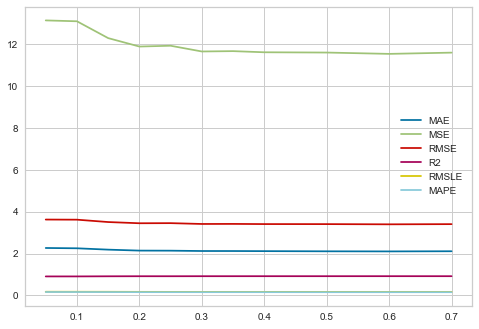

In [20]:
df_resultados = pd.concat(resultados, axis=0)
df_resultados.index = threshold
df_resultados.plot()

In [21]:
df_resultados['Nr_Variaveis'] = nr_variaveis
print(df_resultados)

         MAE      MSE    RMSE      R2   RMSLE    MAPE  Nr_Variaveis
0.05  2.2641  13.1201  3.6206  0.9079  0.1768  0.1642             5
0.10  2.2496  13.0786  3.6146  0.9082  0.1761  0.1628             6
0.15  2.1854  12.2755  3.5017  0.9139  0.1748  0.1611            10
0.20  2.1396  11.8739  3.4441  0.9167  0.1718  0.1578            13
0.25  2.1364  11.9117  3.4493  0.9164  0.1703  0.1569            16
0.30  2.1200  11.6383  3.4099  0.9183  0.1698  0.1566            23
0.35  2.1190  11.6545  3.4128  0.9182  0.1695  0.1567            26
0.40  2.1141  11.6001  3.4046  0.9186  0.1695  0.1565            28
0.50  2.1057  11.5871  3.4029  0.9187  0.1683  0.1551            29
0.60  2.1012  11.5234  3.3932  0.9191  0.1679  0.1547            34
0.70  2.1085  11.5832  3.4019  0.9187  0.1682  0.1551            39


### 2.4. Setup 4: Tunning manual de 'feature selection'

In [53]:
# Preprocessing

# Data Preparation - Cardinal Encoding

# Ao invés de utilizar One Hot Encoding para criação de variáveis dummies, troca a variável categórica de alta
# cardinalidade por uma variável numérica representada pela frequencia.
p_high_cardinality_features = ['orig&dest']
p_high_cardinality_method = 'frequency'

# Feature Engineering - Feature Interaction

# Combina variáveis utilizando operações aritméticas
p_feature_interaction = False

# Feature Engineering - Polynomial Features

# Cria variáveis polinomiais a partir das variáveis existentes em busca de melhorar eventuais relações
# não lineares entre variáveis dependente e independentes.
p_polynomial_features = False

# Feature Selection - Feature Importance

# Utiliza técnicas de importância de variável baseada na permutação para selecionar um subset de variáveis
p_feature_selection = True

In [54]:
threshold = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.60, 0.70]
erros = []
nr_variaveis = []
for x in threshold:
    setup(data = dataset, target = 'duracao', fold_shuffle = True, session_id = 123, train_size = 0.8, silent = True,
          high_cardinality_features = p_high_cardinality_features,
          high_cardinality_method = p_high_cardinality_method,
          feature_interaction = p_feature_interaction,
          polynomial_features = p_polynomial_features,
          feature_selection = p_feature_selection,
          feature_selection_threshold = x )     
    catboost = create_model('catboost', 
                            fold = pFold, 
                            round = 4 )
    erros.append( pull().loc[['Mean']] )
    
    # Recupera o número de variáveis significativas do modelo
    X_train = get_config(variable="X_train")
    nr_variaveis.append(X_train.shape[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0734,11.0661,3.3266,0.9202,0.1701,0.1557
1,2.0541,10.5622,3.2499,0.9243,0.1653,0.1528
2,2.1618,12.4772,3.5323,0.9170,0.1691,0.1544
3,2.1128,11.5343,3.3962,0.9183,0.1707,0.1585
Mean,2.1005,11.4100,3.3763,0.9199,0.1688,0.1553
SD,0.0412,0.7056,0.1039,0.0028,0.0021,0.0021


In [55]:
df_resultados = pd.concat(erros, axis=0)
df_resultados.index = threshold
df_resultados['Nr_Variaveis'] = nr_variaveis
print(df_resultados)

         MAE      MSE    RMSE      R2   RMSLE    MAPE  Nr_Variaveis
0.05  2.2486  12.9599  3.5983  0.9090  0.1759  0.1630             3
0.10  2.2488  13.0851  3.6155  0.9082  0.1760  0.1625             4
0.15  2.1991  12.3862  3.5182  0.9130  0.1745  0.1611             6
0.20  2.1389  11.9593  3.4564  0.9161  0.1713  0.1573            10
0.25  2.1235  11.6829  3.4165  0.9180  0.1702  0.1567            13
0.30  2.1206  11.6443  3.4110  0.9183  0.1699  0.1567            15
0.35  2.1063  11.5005  3.3900  0.9193  0.1689  0.1559            18
0.40  2.1104  11.5097  3.3909  0.9192  0.1690  0.1559            19
0.45  2.1035  11.4458  3.3817  0.9197  0.1689  0.1556            20
0.50  2.1004  11.3895  3.3733  0.9201  0.1684  0.1553            22
0.60  2.1023  11.4324  3.3796  0.9198  0.1685  0.1551            25
0.70  2.1005  11.4100  3.3763  0.9199  0.1688  0.1553            29


### 2.5. Setup 5: Stacking

In [25]:
setup_Customizado = setup(data = dataset, target = 'duracao', fold_shuffle = True, session_id = 123, train_size = 0.8, silent = True)

,Description,Value
0,session_id,123
1,Target,duracao
2,Original Data,"(21417, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(17133, 219)"


In [26]:
top5 = compare_models(fold = pFold, n_select = 5, exclude = ['huber', 'lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.1125,11.4702,3.3852,0.9195,0.1692,0.1566,0.1900
catboost,CatBoost Regressor,2.1308,11.4648,3.3847,0.9195,0.1707,0.1593,2.0925
xgboost,Extreme Gradient Boosting,2.1052,11.7671,3.4285,0.9174,0.1688,0.1545,3.1050
gbr,Gradient Boosting Regressor,2.2683,12.2943,3.5048,0.9137,0.1810,0.1728,2.1600
rf,Random Forest Regressor,2.0841,12.8107,3.5782,0.9100,0.1705,0.1469,3.0075
ridge,Ridge Regression,2.3403,13.1392,3.6231,0.9078,0.1937,0.1832,0.0975
br,Bayesian Ridge,2.3413,13.1302,3.6219,0.9078,0.1937,0.1833,0.2500
omp,Orthogonal Matching Pursuit,2.3898,13.5593,3.6804,0.9048,0.1988,0.1847,0.1100
lr,Linear Regression,2.4282,13.7249,3.7018,0.9037,0.2160,0.2022,0.1400
ada,AdaBoost Regressor,2.7657,15.3604,3.9182,0.8921,0.2558,0.2737,1.3850


In [27]:
# stack models
stacker = stack_models([top5[0], top5[1], top5[2]], fold = pFold)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1056,11.1560,3.3401,0.9195,0.1712,0.1589
1,2.0825,10.7075,3.2722,0.9232,0.1684,0.1563
2,2.1866,12.8935,3.5907,0.9142,0.1696,0.1561
3,2.1482,11.7732,3.4312,0.9166,0.1730,0.1610
Mean,2.1307,11.6325,3.4086,0.9184,0.1705,0.1581
SD,0.0399,0.8205,0.1194,0.0034,0.0017,0.0020


### 2.6. Setup 6: Configuração final

Tendo em vista os resultados obtidos anteriormente nos testes feitos com diferentes setups, procede-se à criação do modelo final com as seguintes características:

- variável 'orig&dest' como variável numérica representada pela frequência
- feature selection ativada com threshold = 0,45
- sem combinação de variáveis (nem aritmética nem polinomial)
- sem 'stacking'

In [6]:
# Preprocessing

# Data Preparation - Cardinal Encoding

# Ao invés de utilizar One Hot Encoding para criação de variáveis dummies, troca a variável categórica de alta
# cardinalidade por uma variável numérica representada pela frequencia.
p_high_cardinality_features = ['orig&dest']
p_high_cardinality_method = 'frequency'

In [7]:
setup_Customizado = setup(data = dataset, target = 'duracao', fold_shuffle = True, session_id = 123, train_size = 0.8, silent = True,
      high_cardinality_features = p_high_cardinality_features,
      high_cardinality_method = p_high_cardinality_method,
      feature_interaction = False,
      polynomial_features = False,
      feature_selection = True,
      feature_selection_threshold = 0.35) 

,Description,Value
0,session_id,123
1,Target,duracao
2,Original Data,"(21417, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(17133, 18)"


In [8]:
catboost = create_model('catboost', fold = pFold, round = 4 )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0798,11.0784,3.3284,0.9201,0.1693,0.1559
1,2.0652,10.7125,3.2730,0.9232,0.1654,0.1532
2,2.1600,12.3705,3.5172,0.9177,0.1690,0.1547
3,2.1260,11.6118,3.4076,0.9178,0.1707,0.1591
Mean,2.1078,11.4433,3.3815,0.9197,0.1686,0.1557
SD,0.0376,0.6235,0.0918,0.0023,0.0020,0.0022


In [31]:
# Variáveis do dataset
X_train = get_config(variable="X_train")
print('X_train: ' + str(list(X_train)))

X_train: ['HDD_10', 'orig&dest', 'DDS_Friday', 'HDD_9', 'DDS_Thursday', 'HDD_11', 'HDD_17', 'HDD_15', 'HDD_8', 'DDS_Saturday', 'HDD_12', 'HDD_13', 'delta_elevacao', 'distancia', 'DDS_Tuesday', 'HDD_16', 'peso_bruto', 'DDS_Wednesday']


In [32]:
print('Quantidade de variáveis: ', X_train.shape[1])

Quantidade de variáveis:  18


In [9]:
# Grau de importância das variáveis selecionadas
df_features = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : catboost.feature_importances_}).sort_values(by='Value', ascending=False)
df_features

,Feature,Value
17,distancia,77.317438
7,delta_elevacao,7.044365
10,peso_bruto,4.682450
5,orig&dest,3.921641
2,DDS_Friday,1.620454
4,HDD_17,0.843301
3,HDD_16,0.842980
8,DDS_Wednesday,0.546178
9,DDS_Thursday,0.544330
14,HDD_8,0.517258


## 3. Análise do modelo

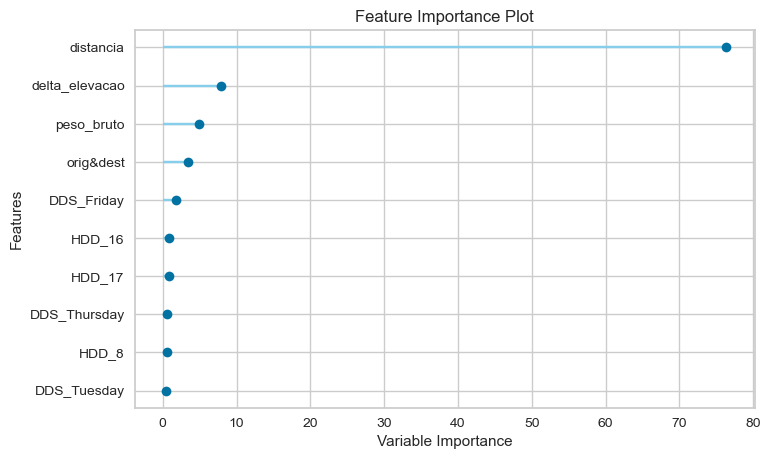

In [34]:
#Análise de importância das variáveis selecionadas
plot_model(catboost, plot='feature')

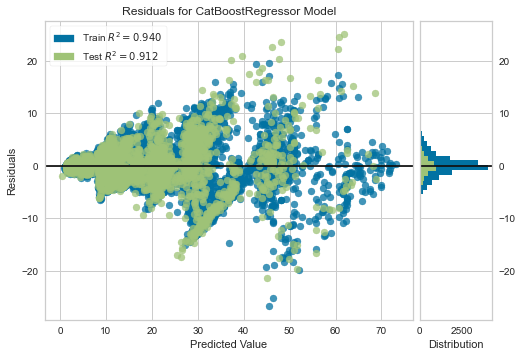

In [35]:
plot_model(catboost, plot = 'residuals')

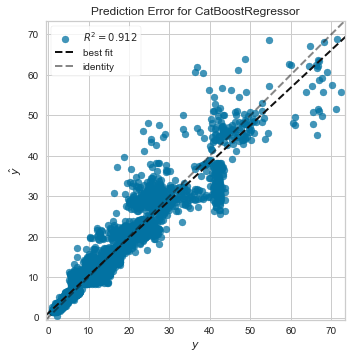

In [36]:
plot_model(catboost, plot = 'error')

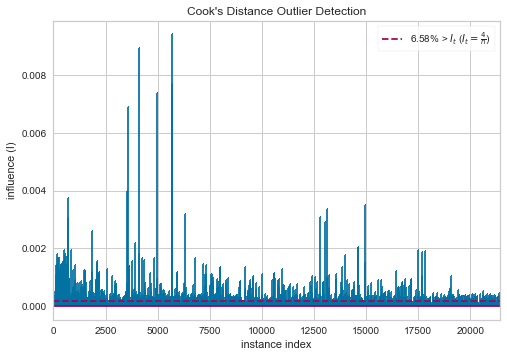

In [37]:
# Cooks Distance
plot_model(catboost, plot='cooks')

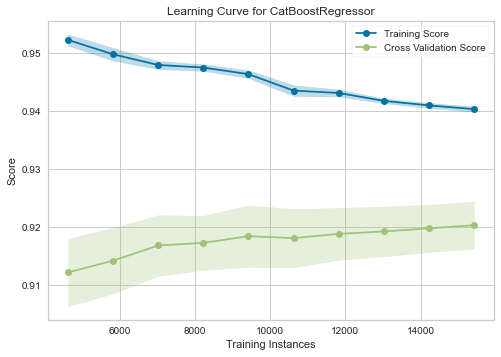

In [38]:
# Learning Curve
plot_model(catboost, plot='learning')

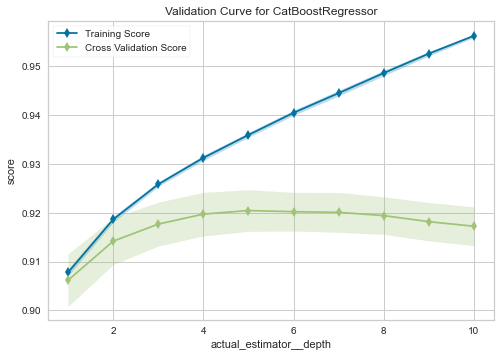

In [39]:
# Validation Curve
plot_model(catboost, plot='vc')

In [10]:
# Model Hyperparameter
plot_model(catboost, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


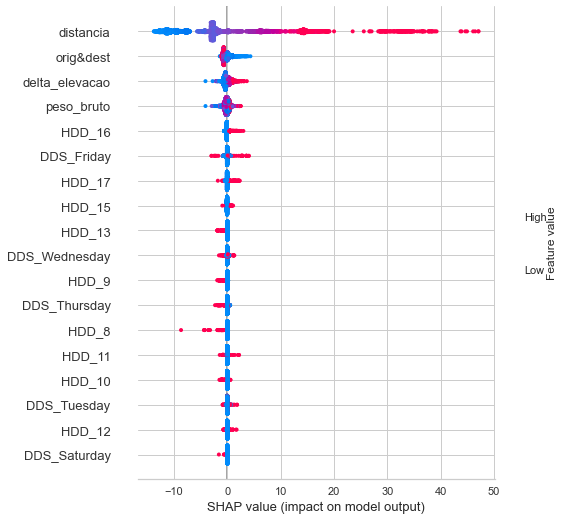

In [46]:
# Interpretação do modelo com base nos valores SHAP (SHapley Additive exPlanations).  
# Gráfico com o sumário das variáveis e os respectivos valores SHAP:
    
interpret_model(catboost)

In [11]:
# A título de exemplo, o gráfico do tipo 'reason' com os valores de SHAP para a observação de index = 1:
interpret_model(catboost, plot = 'reason', observation = 1)

## 4. Aplicando o modelo nos dados de teste

In [12]:
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.0864,11.6745,3.4168,0.9116,0.1676,0.1549


,DDS_Saturday,HDD_11,DDS_Friday,HDD_16,HDD_17,orig&dest,HDD_12,delta_elevacao,DDS_Wednesday,DDS_Thursday,peso_bruto,DDS_Tuesday,HDD_10,HDD_15,HDD_8,HDD_13,HDD_9,distancia,duracao,Label
0,0.0,0.0,0.0,0.0,1.0,2310.0,0.0,-596.585388,0.0,1.0,26112.000000,0.0,0.0,0.0,0.0,0.0,0.0,414.000000,10.290277,10.801092
1,0.0,0.0,0.0,0.0,0.0,141.0,0.0,-779.608887,1.0,0.0,30143.000000,0.0,0.0,1.0,0.0,0.0,0.0,577.000000,19.461390,18.802617
2,0.0,0.0,0.0,1.0,0.0,1789.0,0.0,-848.547913,0.0,0.0,44470.000000,0.0,0.0,0.0,0.0,0.0,0.0,379.000000,14.432500,10.788304
3,0.0,0.0,0.0,0.0,0.0,2310.0,0.0,-596.585388,1.0,0.0,24200.000000,0.0,0.0,0.0,0.0,0.0,0.0,414.000000,12.510834,10.760823
4,0.0,0.0,0.0,0.0,0.0,980.0,0.0,-767.854797,0.0,0.0,22406.000000,0.0,0.0,0.0,0.0,0.0,0.0,50.099998,2.152500,1.882142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.0,0.0,0.0,0.0,0.0,89.0,0.0,0.027576,1.0,0.0,6475.439941,0.0,0.0,1.0,0.0,0.0,0.0,498.000000,15.604445,16.434964
4280,0.0,0.0,0.0,0.0,0.0,911.0,0.0,724.149902,0.0,1.0,4449.500000,0.0,0.0,0.0,0.0,0.0,0.0,1164.000000,27.534445,29.561694
4281,0.0,1.0,1.0,0.0,0.0,885.0,0.0,-621.545959,0.0,0.0,25872.000000,0.0,0.0,0.0,0.0,0.0,0.0,191.000000,7.276667,5.934610
4282,0.0,0.0,0.0,0.0,1.0,2310.0,0.0,-596.585388,1.0,0.0,24200.000000,0.0,0.0,0.0,0.0,0.0,0.0,414.000000,9.397223,10.898490
